In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math

In [2]:
df = pd.read_excel('mental_health_dataset_bangla.xlsx')

In [3]:
df.head

<bound method NDFrame.head of                                              Description Mental_State
0       প্রতি একক দিনে প্রচুর পরিমাণে  ভোজ্য এবং জিনি...    Addiction
1      আমার ভাইয়েরা গত ৫ বছর ধরে হেরোইন/মেথের শুটিং ...    Addiction
2      আমি মিডল স্কুলে ৮ম শ্রেণী থেকে আগাছা ধূমপান কর...    Addiction
3       আমি অন্টারিও, কানাডার একজন সাংবাদিকতার ছাত্র।...    Addiction
4      চিন্তা করবেন না আমি এই বিষয়ে কতটা পোস্ট করি আ...    Addiction
...                                                  ...          ...
10282         প্যাটেলদের জন্য আপনার চিন্তা কি রিজার্ভেশন      Neutral
10283  কেউ কি দয়া করে সাহায্য করতে পারেন কিভাবে ডান্...      Neutral
10284   ভাই প্রকৃত সুবিধাভোগীরা ইন্টারনেট ব্যবহার করে...      Neutral
10285   দিল্লি চন্ডিগড় তৈরি করা হয়েছিল বছরের পর বছর...      Neutral
10286   আগে কেউ সরকারের সমালোচনা করতে পারত না, দেশবির...      Neutral

[10287 rows x 2 columns]>

In [4]:
df.groupby("Mental_State").describe()

Description         \
                       count unique   
Mental_State                          
Addiction                921    916   
Alcoholism               986    983   
Anxiety                  991    991   
Aspergers                789    787   
BPD                      995    995   
Bipolar                 1000   1000   
Depression               943    942   
Neutral                 1002   1002   
Schizophrenia            988    987   
Self Harm                671    671   
Suicidal Thought        1001   1000   

                                                                          
                                                                top freq  
Mental_State                                                              
Addiction         আমি ৬ বছর বয়সী এবং আমি ধূমপান শুরু করতে চাই, ...    2  
Alcoholism        আমি এটার সাথে আমার প্রথম লড়াই থেকে আমার পাঠ শ...    2  
Anxiety            আমি জানি এটা শুধু একটা চিন্তা কিন্তু আমি ঘৃণা...    1  
Aspergers         তাই আমি আমার জীবনে অনেক কঠিন মুহুর্তের মধ্য দি...    2  
BPD               আমি মনে করি আমি সবসময় ভালবাসা কঠিন হবে এবং শে...    1  
Bipolar           অন্য কেউ কি চরম অত্যধিক সংবেদনশীলতা ভোগ করেন? ...    1  
Depression        আমি এখন পর্যন্ত ২৯ সালের সবচেয়ে কম শুরু করছি।...    2  
Neutral            তুমি কি পেলে? আমার দিন ঠিক আছে.. এখনও কিছু কর...    1  
Schizophrenia     হাসপাতালে ভর্তি হতে আপনার বা প্রিয়জনের কি হয়...    2  
Self Harm         আমার মেয়ের বয়স ৪ এবং গত বছর তার সেরা বন্ধু ত...    1  
Suicidal Thought  খারাপ স্ত্রী/মা আমি দুঃখিত। আমি নিশ্চিত নই যে ...    2

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import LabelBinarizer

In [6]:
count_vect = CountVectorizer() # for converting text into count-based vectors
tfidf_transformer = TfidfTransformer() # for converting text into tf-idf-based vectors
lb = LabelBinarizer() # object for making class-labels into binary numbers

In [7]:
df.columns

Index(['Description', 'Mental_State'], dtype='object')

In [8]:
df.head

<bound method NDFrame.head of                                              Description Mental_State
0       প্রতি একক দিনে প্রচুর পরিমাণে  ভোজ্য এবং জিনি...    Addiction
1      আমার ভাইয়েরা গত ৫ বছর ধরে হেরোইন/মেথের শুটিং ...    Addiction
2      আমি মিডল স্কুলে ৮ম শ্রেণী থেকে আগাছা ধূমপান কর...    Addiction
3       আমি অন্টারিও, কানাডার একজন সাংবাদিকতার ছাত্র।...    Addiction
4      চিন্তা করবেন না আমি এই বিষয়ে কতটা পোস্ট করি আ...    Addiction
...                                                  ...          ...
10282         প্যাটেলদের জন্য আপনার চিন্তা কি রিজার্ভেশন      Neutral
10283  কেউ কি দয়া করে সাহায্য করতে পারেন কিভাবে ডান্...      Neutral
10284   ভাই প্রকৃত সুবিধাভোগীরা ইন্টারনেট ব্যবহার করে...      Neutral
10285   দিল্লি চন্ডিগড় তৈরি করা হয়েছিল বছরের পর বছর...      Neutral
10286   আগে কেউ সরকারের সমালোচনা করতে পারত না, দেশবির...      Neutral

[10287 rows x 2 columns]>

In [9]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["Mental_State_label"] = lb_make.fit_transform(df["Mental_State"])
df[["Mental_State", "Mental_State_label"]].head(11)



,Mental_State,Mental_State_label
0,Addiction,0
1,Addiction,0
2,Addiction,0
3,Addiction,0
4,Addiction,0
5,Addiction,0
6,Addiction,0
7,Addiction,0
8,Addiction,0
9,Addiction,0


In [10]:
df

,Description,Mental_State,Mental_State_label
0,প্রতি একক দিনে প্রচুর পরিমাণে ভোজ্য এবং জিনি...,Addiction,0
1,আমার ভাইয়েরা গত ৫ বছর ধরে হেরোইন/মেথের শুটিং ...,Addiction,0
2,আমি মিডল স্কুলে ৮ম শ্রেণী থেকে আগাছা ধূমপান কর...,Addiction,0
3,"আমি অন্টারিও, কানাডার একজন সাংবাদিকতার ছাত্র।...",Addiction,0
4,চিন্তা করবেন না আমি এই বিষয়ে কতটা পোস্ট করি আ...,Addiction,0
...,...,...,...
10282,প্যাটেলদের জন্য আপনার চিন্তা কি রিজার্ভেশন,Neutral,7
10283,কেউ কি দয়া করে সাহায্য করতে পারেন কিভাবে ডান্...,Neutral,7
10284,ভাই প্রকৃত সুবিধাভোগীরা ইন্টারনেট ব্যবহার করে...,Neutral,7
10285,দিল্লি চন্ডিগড় তৈরি করা হয়েছিল বছরের পর বছর...,Neutral,7


In [11]:
df.isnull()

,Description,Mental_State,Mental_State_label
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
10282,False,False,False
10283,False,False,False
10284,False,False,False
10285,False,False,False


In [12]:
df.dropna(inplace=True)

In [13]:
df

,Description,Mental_State,Mental_State_label
0,প্রতি একক দিনে প্রচুর পরিমাণে ভোজ্য এবং জিনি...,Addiction,0
1,আমার ভাইয়েরা গত ৫ বছর ধরে হেরোইন/মেথের শুটিং ...,Addiction,0
2,আমি মিডল স্কুলে ৮ম শ্রেণী থেকে আগাছা ধূমপান কর...,Addiction,0
3,"আমি অন্টারিও, কানাডার একজন সাংবাদিকতার ছাত্র।...",Addiction,0
4,চিন্তা করবেন না আমি এই বিষয়ে কতটা পোস্ট করি আ...,Addiction,0
...,...,...,...
10282,প্যাটেলদের জন্য আপনার চিন্তা কি রিজার্ভেশন,Neutral,7
10283,কেউ কি দয়া করে সাহায্য করতে পারেন কিভাবে ডান্...,Neutral,7
10284,ভাই প্রকৃত সুবিধাভোগীরা ইন্টারনেট ব্যবহার করে...,Neutral,7
10285,দিল্লি চন্ডিগড় তৈরি করা হয়েছিল বছরের পর বছর...,Neutral,7


In [14]:
text = df['Description'].values.tolist()

In [15]:
df.groupby("Mental_State").describe()

Mental_State_label                                         
                              count  mean  std   min   25%   50%   75%   max
Mental_State                                                                
Addiction                     921.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0
Alcoholism                    986.0   1.0  0.0   1.0   1.0   1.0   1.0   1.0
Anxiety                       991.0   2.0  0.0   2.0   2.0   2.0   2.0   2.0
Aspergers                     789.0   3.0  0.0   3.0   3.0   3.0   3.0   3.0
BPD                           995.0   4.0  0.0   4.0   4.0   4.0   4.0   4.0
Bipolar                      1000.0   5.0  0.0   5.0   5.0   5.0   5.0   5.0
Depression                    943.0   6.0  0.0   6.0   6.0   6.0   6.0   6.0
Neutral                      1002.0   7.0  0.0   7.0   7.0   7.0   7.0   7.0
Schizophrenia                 988.0   8.0  0.0   8.0   8.0   8.0   8.0   8.0
Self Harm                     671.0   9.0  0.0   9.0   9.0   9.0   9.0   9.0
Suicidal Thought             1001.0  10.0  0.0  10.0  10.0  10.0  10.0  10.0

In [16]:
df["Mental_State"].value_counts()

Neutral             1002
Suicidal Thought    1001
Bipolar             1000
BPD                  995
Anxiety              991
Schizophrenia        988
Alcoholism           986
Depression           943
Addiction            921
Aspergers            789
Self Harm            671
Name: Mental_State, dtype: int64

C:\Users\moshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


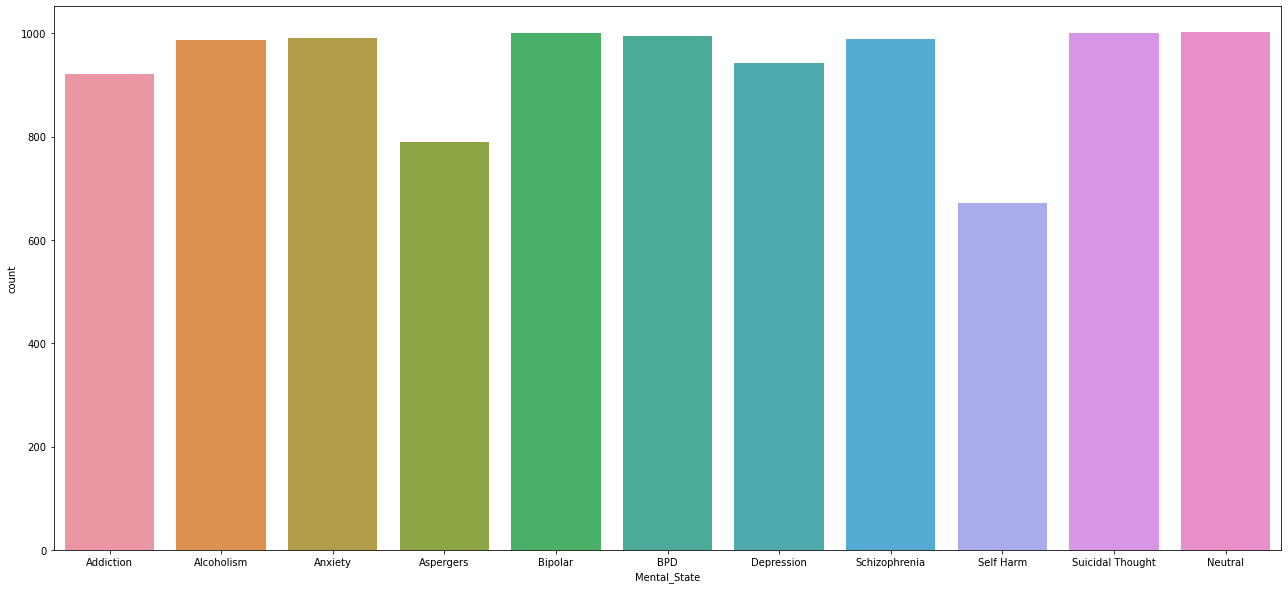

In [17]:
plt.subplots(figsize=(22,10))
sns.countplot(df["Mental_State"])
plt.show()

In [18]:
longest_string = max(df["Description"], key=len)
print(len(longest_string))

13931


In [19]:
import nltk

from bs4 import BeautifulSoup

import re,string,unicodedata

In [20]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on description column
df['Description']=df['Description'].apply(denoise_text)

C:\Users\moshi\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [21]:
#remove special character
def rem_special_characters(text):
    pattern = re.compile('[!@#$%^&*()_+-={}\[\];:\'\"\|<>,.///?`~।]', flags=re.I)
    return pattern.sub(r'', text)
#remove non bangla character
def rem_non_bangla_characters(text):
    pattern = re.compile('[A-Z]', flags=re.I)
    return pattern.sub(r'', text)
#remove non empticons character
def rem_emoticons(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

#remove noise
def Remove_text(text):
    text = rem_special_characters(text)
    text = rem_non_bangla_characters(text)
    text = rem_emoticons(text)
    return text
#Apply function on description column
df['Description']=df['Description'].apply(Remove_text)

In [22]:
df['Description']

0         প্রতি একক দিনে প্রচুর পরিমাণে  ভোজ্য এবং জিনি...
1        আমার ভাইয়েরা গত ৫ বছর ধরে হেরোইনমেথের শুটিং ক...
2        আমি মিডল স্কুলে ৮ম শ্রেণী থেকে আগাছা ধূমপান কর...
3         আমি অন্টারিও কানাডার একজন সাংবাদিকতার ছাত্র আ...
4        চিন্তা করবেন না আমি এই বিষয়ে কতটা পোস্ট করি আ...
                               ...                        
10282           প্যাটেলদের জন্য আপনার চিন্তা কি রিজার্ভেশন
10283    কেউ কি দয়া করে সাহায্য করতে পারেন কিভাবে ডান্...
10284     ভাই প্রকৃত সুবিধাভোগীরা ইন্টারনেট ব্যবহার করে...
10285     দিল্লি চন্ডিগড় তৈরি করা হয়েছিল বছরের পর বছর...
10286     আগে কেউ সরকারের সমালোচনা করতে পারত না দেশবিরো...
Name: Description, Length: 10287, dtype: object

In [23]:
longest_string = max(df["Description"], key=len)
print(len(longest_string))

13649


In [24]:
def tokenized_data(sent):
    tokenized_text = sent.split()
    return tokenized_text

In [25]:
stop_words = { "অবশ্য" ,"অনেক","অনেকে","অনেকেই","অন্তত","অথবা","অথচ","অর্থাত","অন্য","আজ","আছে","আপনার","আপনি","আবার","আমরা"
"আমাকে","আমাদের","আমার","আমি","আরও","আর","আগে","আগেই","আই","অতএব","আগামী","অবধি","অনুযায়ী","আদ্যভাগে","এই","একই","একে",
"একটি","এখন","এখনও","এখানে","এখানেই",
"এটি",
"এটা",
"এটাই",
"এতটাই",
"এবং",
"একবার",
"এবার",
"এদের",
"এঁদের",
"এমন",
"এমনকী",
"এল",
"এর",
"এরা",
"এঁরা",
"এস",
"এত",
"এতে",
"এসে",
"একে",
"এ",
"ঐ",
"ই",
"ইহা",
"ইত্যাদি",
"উনি",
"উপর",
"উপরে",
"উচিত",
"ও",
"ওই",
"ওর",
"ওরা",
"ওঁর",
"ওঁরা",
"ওকে",
"ওদের",
"ওঁদের",
"ওখানে",
'কত',
"কবে",
'করতে',
"কয়েক"
"কয়েকটি",
"করবে",
"করলেন",
"করার",
"কারও",
"করা",
"করি",
"করিয়ে",
"করার",
"করাই",
"করলে",
"করলেন",
"করিতে",
"করিয়া",
"করেছিলেন",
"করছে",
"করছেন",
"করেছেন",
"করেছে",
"করেন",
"করবেন",
"করায়",
"করে",
"করেই",
"কাছ",
"কাছে",
"কাজে",
"কারণ",
"কিছু",
"কিছুই",
"কিন্তু",
"কিংবা",
"কি",
"কী",
"কেউ",
"কেউই",
"কাউকে",
"কেন",
"কে",
"কোনও",
"কোনো",
"কোন",
"কখনও",
"ক্ষেত্রে",
"খুব",
"গুলি",
"গিয়ে",
"গিয়েছে",
"গেছে",
"গেল",
"গেলে",
"গোটা",
"চলে",
"ছাড়া",
"ছাড়াও",
"ছিলেন",
"ছিল",
"জন্য",
"জানা",
"ঠিক",
"তিনি",
"তিনঐ",
"তিনিও",
"তখন",
"তবে",
"তবু",
"তাঁদের",
"তাঁাহারা",
"তাঁরা",
"তাঁর",
"তাঁকে",
"তাই",
"তেমন",
"তাকে",
"তাহা",
"তাহাতে",
"তাহার",
"তাদের",
"তারপর",
"তারা",
"তারৈ",
"তার",
"তাহলে",
"তিনি",
"তা",
"তাও",
"তাতে",
"তো",
"তত",
"তুমি",
"তোমার",
"তথা",
"থাকে",
"থাকা",
"থাকায়",
"থেকে",
"থেকেও",
"থাকবে",
"থাকেন",
"থাকবেন",
"থেকেই",
"দিকে",
"দিতে",
"দিয়ে",
"দিয়েছে",
"দিয়েছেন",
"দিলেন",
"দু",
"দুটি",
"দুটো",
"দেয়",
"দেওয়া",
"দেওয়ার",
"দেখা",
"দেখে",
"দেখতে",
"দ্বারা",
"ধরে",
"ধরা",
"নয়",
"নানা",
"না",
"নাকি",
"নাগাদ",
"নিতে",
"নিজে",
"নিজেই",
"নিজের",
"নিজেদের",
"নিয়ে",
"নেওয়া",
"নেওয়ার",
"নেই",
"নাই",
"পক্ষে",
"পর্যন্ত",
"পাওয়া",
"পারেন",
"পারি",
"পারে",
"পরে",
"পরেই",
"পরেও",
"পর",
"পেয়ে",
"প্রতি",
"প্রভৃতি",
"প্রায়",
"ফের",
"ফলে",
"ফিরে",
"ব্যবহার",
"বলতে",
"বললেন",
"বলেছেন",
"বলল",
"বলা",
"বলেন",
"বলে",
"বহু",
"বসে",
"বার",
"বা",
"বিনা",
"বরং",
"বদলে",
"বাদে",
"বার",
"বিশেষ",
"বিভিন্ন",
"বিষয়টি",
"ব্যবহার",
"ব্যাপারে"
"ভাবে",
"ভাবেই",
"মধ্যে",
"মধ্যেই",
"মধ্যেও",
"মধ্যভাগে",
"মাধ্যমে",
"মাত্র",
"মতো",
"মতোই",
"মোটেই",
"যখন",
"যদি",
"যদিও",
"যাবে",
"যায়",
"যাকে",
"যাওয়া",
"যাওয়ার",
"যত",
"যতটা",
"যা",
"যার",
"যারা",
"যাঁর",
"যাঁরা",
"যাদের",
"যান",
"যাচ্ছে",
"যেতে",
"যাতে",
"যেন",
"যেমন",
"যেখানে",
"যিনি",
"যে",
"রেখে",
"রাখা",
"রয়েছে",
"রকম",
"শুধু",
"সঙ্গে",
"সঙ্গেও",
"সমস্ত",
"সব",
"সবার",
"সহ",
"সুতরাং",
"সহিত",
"সেই",
"সেটা",
"সেটি",
"সেটাই",
"সেটাও",
"সম্প্রতি",
"সেখান",
"সেখানে",
"সে",
"স্পষ্ট",
"স্বয়ং",
"হইতে",
"হইবে",
"হৈলে",
"হইয়া",
"হচ্ছে",
"হত",
"হতে",
"হতেই",
"হবে",
"হবেন",
"হয়েছিল",
"হয়েছে",
"হয়েছেন",
"হয়ে",
"হয়নি",
"হয়",
"হয়েই",
"হয়তো",
"হল",
"হলে",
"হলেই",
"হলেও",
"হলো",
"হিসাবে",
"হওয়া",
"হওয়ার",
"হওয়ায়",
"হন",
"হোক",
"জন",
"জনকে",
"জনের",
"জানতে",
"জানায়",
"জানিয়ে",
"জানানো",
"জানিয়েছে",
"জন্য",
"জন্যওজে",
"জে",
"বেশ",
"দেন",
"তুলে",
"ছিলেন",
"চান",
"চায়",
"চেয়ে",
"মোট",
"যথেষ্ট",
"টি"}

In [26]:
def remove_stop_words(text):
    text = [w for w in text if not w in stop_words]
    text = ' '.join(text)
    return text

In [27]:
df['Description'] = [remove_stop_words(tokenized_data(sent)) for sent in df['Description'].tolist()]

In [28]:
df['Description']

0        একক দিনে প্রচুর পরিমাণে ভোজ্য জিনিসপত্র পাওয়া...
1        ভাইয়েরা গত ৫ বছর হেরোইনমেথের শুটিং ৩ বছর ক্যা...
2        মিডল স্কুলে ৮ম শ্রেণী আগাছা ধূমপান করেছি আগাছা...
3        অন্টারিও কানাডার একজন সাংবাদিকতার ছাত্র ওপিওড ...
4        চিন্তা বিষয়ে কতটা পোস্ট কথা বলার বিষণ্ণতা উদ্...
                               ...                        
10282                         প্যাটেলদের চিন্তা রিজার্ভেশন
10283    দয়া সাহায্য কিভাবে ডান্ডিয়া শিখতে কিভাবে নাচ...
10284                    ভাই প্রকৃত সুবিধাভোগীরা ইন্টারনেট
10285    দিল্লি চন্ডিগড় তৈরি হয়েছিল বছরের বছর ডাম্প চ...
10286    সরকারের সমালোচনা পারত দেশবিরোধী আখ্যা দিয়ে প্...
Name: Description, Length: 10287, dtype: object

In [29]:
longest_string = max(df["Description"], key=len)
print(len(longest_string))

9014


In [30]:
text = df["Description"]

In [31]:
train_counts = count_vect.fit_transform(text) # converting docs into vectors
train_tfidf  = train_counts 
train_tfidf = tfidf_transformer.fit_transform(train_counts) # converting transformed vectors into tf-idf vectors
train_tfidf.shape

(10287, 4708)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(train_tfidf, df['Mental_State_label'], test_size=0.2, random_state=42)

Y_pre = df['Mental_State']
target_names = list(set(Y_pre))

In [34]:
target_names

['Anxiety',
 'BPD',
 'Alcoholism',
 'Bipolar',
 'Addiction',
 'Aspergers',
 'Neutral',
 'Self Harm',
 'Schizophrenia',
 'Suicidal Thought',
 'Depression']

In [35]:
X_train

<8229x4708 sparse matrix of type '<class 'numpy.float64'>'
	with 292055 stored elements in Compressed Sparse Row format>

In [36]:
y_train

9967    7
4043    5
9556    7
994     1
2820    2
       ..
5734    6
5191    4
5390    4
860     0
7270    8
Name: Mental_State_label, Length: 8229, dtype: int32

In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV 

In [38]:
import seaborn as sn

# Naive Bayes

In [39]:
from sklearn.naive_bayes import MultinomialNB

Test set accuracy 0.4990281827016521
                  precision    recall  f1-score   support

         Bipolar       0.73      0.59      0.66       200
      Alcoholism       0.67      0.76      0.71       202
       Addiction       0.44      0.63      0.52       183
   Schizophrenia       0.78      0.29      0.43       160
         Anxiety       0.34      0.59      0.43       216
Suicidal Thought       0.44      0.69      0.54       203
      Depression       0.53      0.30      0.38       182
             BPD       0.95      0.20      0.33       184
       Aspergers       0.51      0.48      0.50       190
         Neutral       0.67      0.03      0.05       146
       Self Harm       0.42      0.70      0.52       192

        accuracy                           0.50      2058
       macro avg       0.59      0.48      0.46      2058
    weighted avg       0.58      0.50      0.47      2058



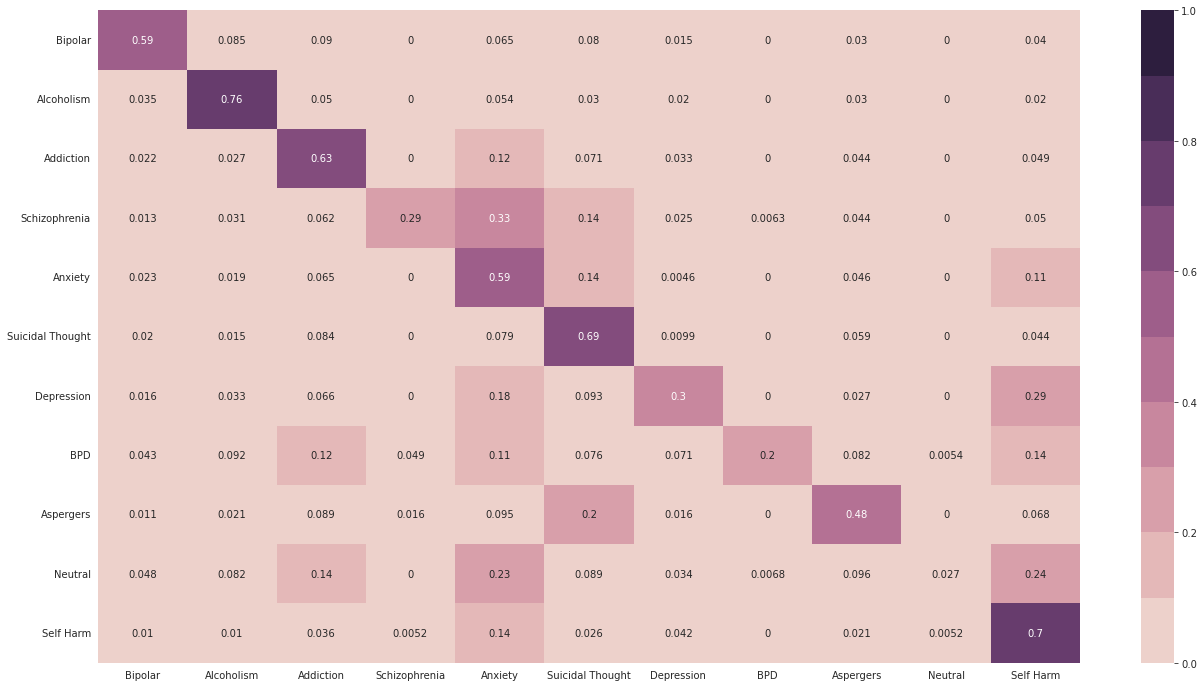

In [40]:
NBclassifer = MultinomialNB()
NBclassifer.fit(X_train, y_train)
y_pred = NBclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)


# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
  

In [41]:
NBclassifer.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [42]:
#Random Search

In [43]:
NBRclassifer = MultinomialNB()

In [44]:
param_NBR = {"alpha": [0.5,0.4,0.3,0.2,0.1,1.0, 2.0, 3.0, 4.0,5.0]}

In [45]:
NBRrandom_search = RandomizedSearchCV(NBRclassifer, param_NBR , cv=5, verbose=1, n_jobs=-1, n_iter=10,return_train_score=True)
NBRrandom_search.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [46]:
NBRrandom_search.cv_results_

{'mean_fit_time': array([0.0104032 , 0.01150241, 0.01199894, 0.01109891, 0.01080437,
        0.01030445, 0.01089911, 0.01059895, 0.01110229, 0.01009841]),
 'std_fit_time': array([0.00058093, 0.00104609, 0.00181635, 0.00058151, 0.0011264 ,
        0.00074603, 0.00066334, 0.00058384, 0.00048977, 0.00049072]),
 'mean_score_time': array([0.00229964, 0.00179968, 0.00189948, 0.00149975, 0.0017992 ,
        0.00180202, 0.00159984, 0.00160041, 0.00189791, 0.00110059]),
 'std_score_time': array([2.44877335e-04, 2.45071087e-04, 3.73657916e-04, 1.70997821e-06,
        4.00055054e-04, 2.44752965e-04, 2.00249773e-04, 3.73171846e-04,
        1.98779314e-04, 1.99533043e-04]),
 'param_alpha': masked_array(data=[0.5, 0.4, 0.3, 0.2, 0.1, 1.0, 2.0, 3.0, 4.0, 5.0],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.5},
  {'alpha': 0.4},
  {'alpha': 0.3},
  {'alpha': 0.2},

In [47]:
NBRrandom_search.score(X_test, y_test)

0.5150631681243926

In [48]:
NBRrandom_search.best_params_

{'alpha': 0.1}

Test set accuracy 0.5150631681243926
                  precision    recall  f1-score   support

         Bipolar       0.65      0.66      0.65       200
      Alcoholism       0.66      0.72      0.69       202
       Addiction       0.48      0.56      0.52       183
   Schizophrenia       0.67      0.47      0.55       160
         Anxiety       0.38      0.45      0.41       216
Suicidal Thought       0.50      0.58      0.54       203
      Depression       0.38      0.42      0.40       182
             BPD       0.74      0.40      0.52       184
       Aspergers       0.49      0.51      0.50       190
         Neutral       0.63      0.16      0.26       146
       Self Harm       0.43      0.62      0.51       192

        accuracy                           0.52      2058
       macro avg       0.55      0.51      0.50      2058
    weighted avg       0.54      0.52      0.51      2058



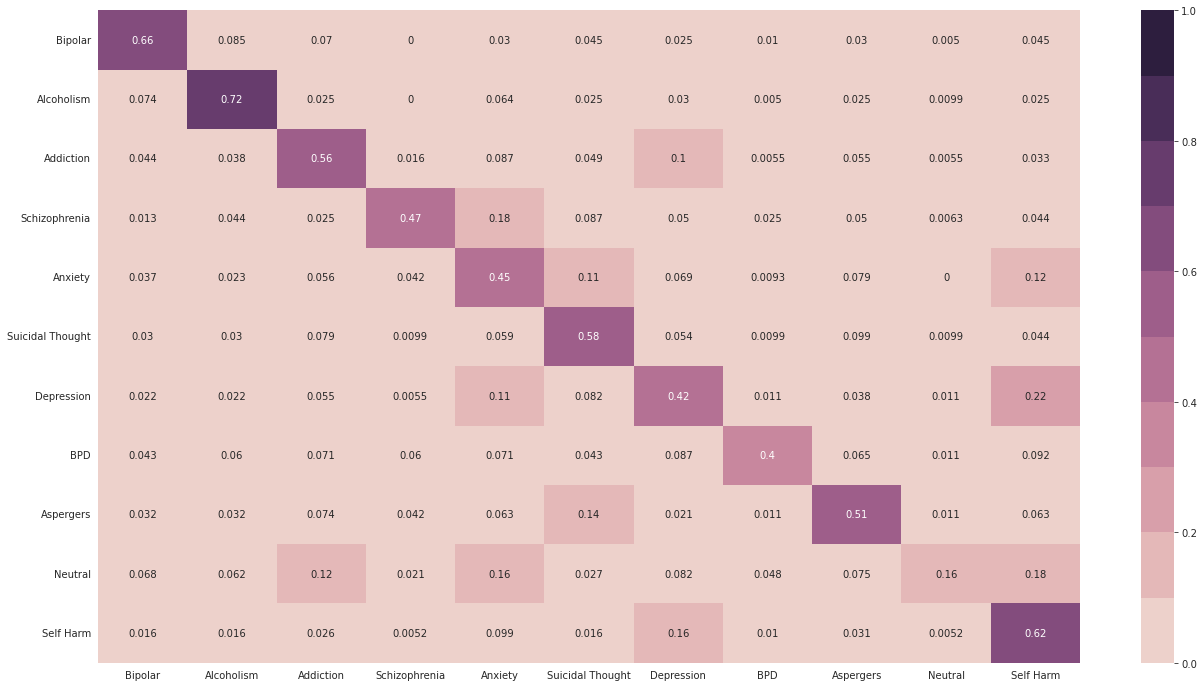

In [49]:
y_pred = NBRrandom_search.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)



# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()

# Support Vector Machine

In [50]:
from sklearn.svm import SVC


Test set accuracy 0.5699708454810496
                  precision    recall  f1-score   support

         Bipolar       0.78      0.66      0.71       200
      Alcoholism       0.79      0.70      0.74       202
       Addiction       0.64      0.66      0.65       183
   Schizophrenia       0.63      0.53      0.57       160
         Anxiety       0.46      0.48      0.47       216
Suicidal Thought       0.59      0.49      0.54       203
      Depression       0.42      0.42      0.42       182
             BPD       0.53      0.90      0.66       184
       Aspergers       0.53      0.53      0.53       190
         Neutral       0.44      0.27      0.34       146
       Self Harm       0.51      0.57      0.54       192

        accuracy                           0.57      2058
       macro avg       0.57      0.56      0.56      2058
    weighted avg       0.58      0.57      0.57      2058



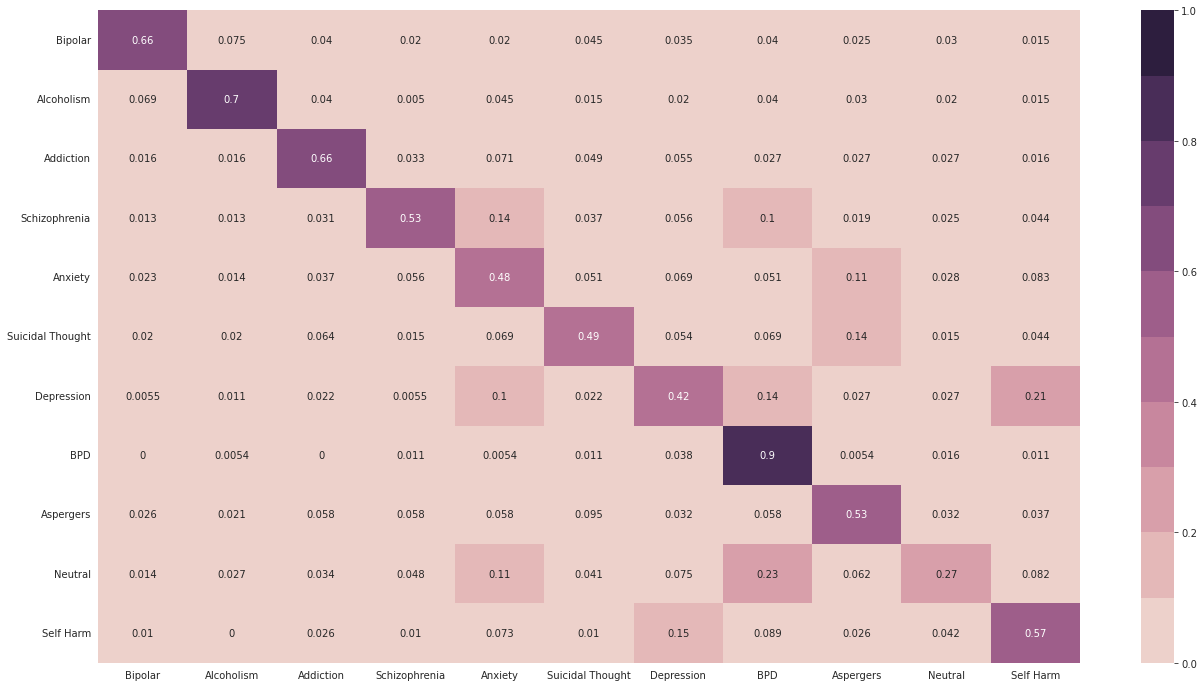

In [51]:
SVMclassifer = SVC()
SVMclassifer.fit(X_train, y_train)
y_pred = SVMclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()

In [52]:
SVMclassifer.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [53]:
#Random Search

In [54]:
SVMRclassifer = SVC()

In [55]:
param_SVM = {
    "C": [0.1,0.2,0.3,0.4,0.5,1.0,3.0,5.0,10,100],
    "tol": [ 0.0, 0.001, 0.01 , 0.1 ]
}

In [56]:
SVMRrandom_search = RandomizedSearchCV(SVMRclassifer, param_SVM, cv=5, verbose=1, n_jobs=-1, n_iter=10,return_train_score=True)
SVMRrandom_search.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\moshi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\moshi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\moshi\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 251, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\moshi\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 374, in _sparse_fit
    ) = libsvm_sparse.libsvm_sparse_train(
  File "s

In [57]:
SVMRrandom_search.cv_results_

{'mean_fit_time': array([4.05016899e-02, 1.79952796e+01, 2.04159024e+01, 1.89737683e+01,
        2.37253004e+01, 1.67790357e+01, 1.64050579e-02, 1.78046227e-02,
        2.08082044e+01, 1.78037167e-02]),
 'std_fit_time': array([1.14354487e-03, 2.03843829e-01, 3.03386873e-01, 2.45664079e-01,
        4.31354540e-01, 1.81737588e+00, 4.94801248e-04, 2.65560146e-03,
        2.50900787e+00, 3.95978164e-03]),
 'mean_score_time': array([0.        , 3.55158792, 3.83965249, 3.46406531, 3.71061091,
        2.91567636, 0.        , 0.        , 3.15618491, 0.        ]),
 'std_score_time': array([0.        , 0.10682969, 0.09132451, 0.21492507, 0.06544029,
        0.47443287, 0.        , 0.        , 0.58641351, 0.        ]),
 'param_tol': masked_array(data=[0.0, 0.1, 0.001, 0.1, 0.001, 0.01, 0.0, 0.0, 0.001,
                    0.0],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_

Test set accuracy 0.575801749271137
                  precision    recall  f1-score   support

         Bipolar       0.73      0.67      0.70       200
      Alcoholism       0.77      0.68      0.72       202
       Addiction       0.63      0.64      0.64       183
   Schizophrenia       0.63      0.59      0.61       160
         Anxiety       0.50      0.47      0.49       216
Suicidal Thought       0.56      0.53      0.55       203
      Depression       0.41      0.41      0.41       182
             BPD       0.57      0.90      0.70       184
       Aspergers       0.53      0.54      0.54       190
         Neutral       0.46      0.29      0.35       146
       Self Harm       0.52      0.56      0.54       192

        accuracy                           0.58      2058
       macro avg       0.57      0.57      0.57      2058
    weighted avg       0.58      0.58      0.57      2058



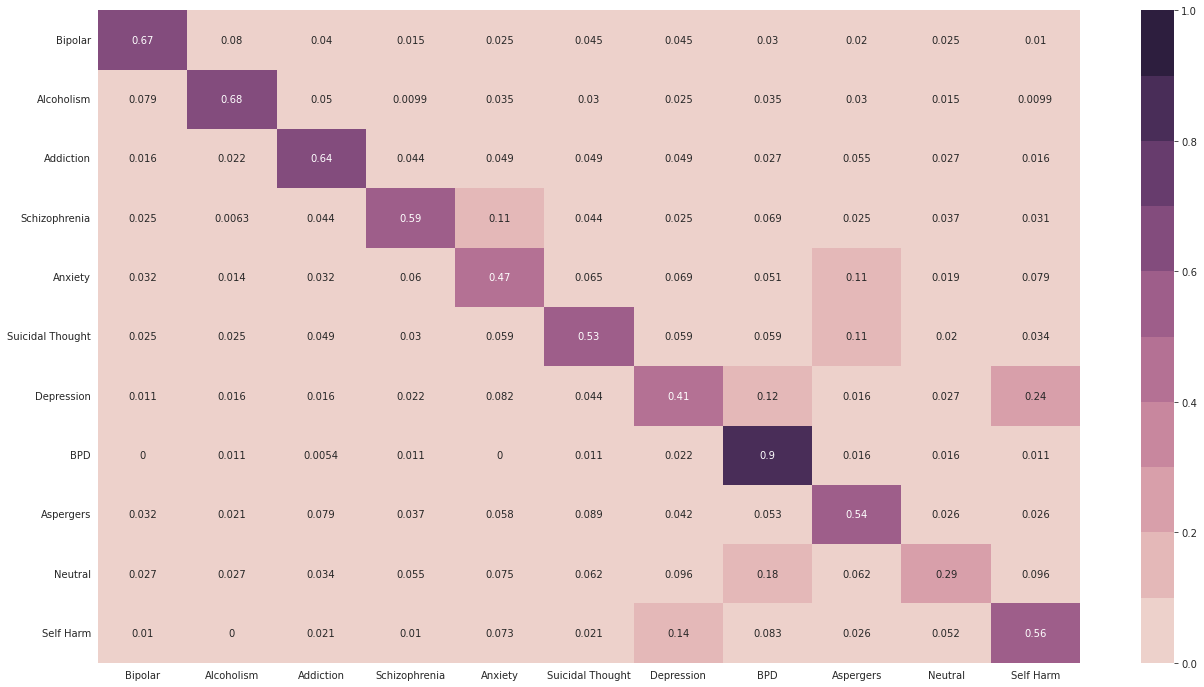

In [58]:
y_pred = SVMRrandom_search.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()

In [59]:
SVMRrandom_search.best_params_

{'tol': 0.001, 'C': 5.0}

# XGBoost

In [60]:
from xgboost import XGBClassifier

Test set accuracy 0.576287657920311
                  precision    recall  f1-score   support

         Bipolar       0.73      0.69      0.71       200
      Alcoholism       0.79      0.68      0.73       202
       Addiction       0.62      0.68      0.65       183
   Schizophrenia       0.61      0.56      0.59       160
         Anxiety       0.46      0.43      0.44       216
Suicidal Thought       0.58      0.53      0.55       203
      Depression       0.39      0.38      0.39       182
             BPD       0.69      0.93      0.79       184
       Aspergers       0.50      0.46      0.48       190
         Neutral       0.41      0.33      0.36       146
       Self Harm       0.50      0.62      0.55       192

        accuracy                           0.58      2058
       macro avg       0.57      0.57      0.57      2058
    weighted avg       0.57      0.58      0.57      2058



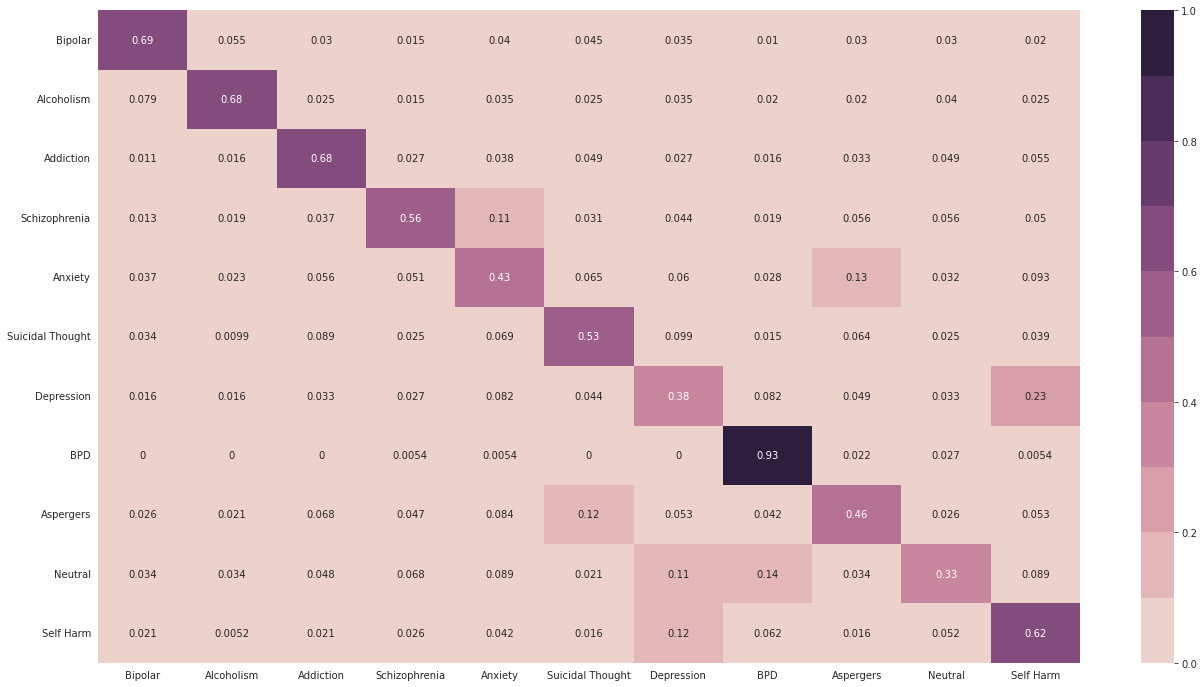

In [61]:
XGBclassifer = XGBClassifier()
XGBclassifer.fit(X_train, y_train)
y_pred = XGBclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()


In [62]:
XGBclassifer.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)>

In [63]:
#random search

In [64]:
XGBRclassifer = XGBClassifier()

In [65]:
params_XGB = {
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30,0.35],
 "max_depth" : [3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [1, 3, 5, 7],
 "gamma": [0.0, 0.1, 0.2 , 0.3, 0.4],
 "colsample_bytree" : [0.2,0.3, 0.5,1.0,1.5]
}

In [66]:
XGBRrandom_search = RandomizedSearchCV(XGBRclassifer, params_XGB, cv=5, verbose=1, n_jobs=-1, n_iter=10, return_train_score=True)
XGBRrandom_search.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\moshi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\moshi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\moshi\anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\moshi\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\moshi\anaconda3\lib\site-packages\xgboost\core.py", line 532, in 

In [67]:
XGBRrandom_search.cv_results_

{'mean_fit_time': array([4.64107332e+01, 3.01569849e+01, 4.99377621e+01, 6.94635923e+01,
        8.24726932e+01, 3.95080001e+01, 2.97605999e+01, 3.33511010e+01,
        7.17709993e+01, 1.30000114e-02]),
 'std_fit_time': array([3.31365863e-01, 2.75032043e-01, 5.32809263e-01, 3.96026888e-01,
        6.56909908e-01, 2.57780130e-01, 3.39248129e-01, 1.03566179e+00,
        1.78190031e+00, 5.46508203e-04]),
 'mean_score_time': array([0.18686967, 0.17752509, 0.0931066 , 0.0811008 , 0.09750004,
        0.21469932, 0.11370091, 0.17449799, 0.17019882, 0.        ]),
 'std_score_time': array([0.00368702, 0.00158589, 0.00058762, 0.00128051, 0.00437054,
        0.00143464, 0.00185878, 0.00449454, 0.00420246, 0.        ]),
 'param_min_child_weight': masked_array(data=[5, 7, 1, 5, 5, 5, 7, 3, 1, 1],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[12,

Test set accuracy 0.5806608357628765
                  precision    recall  f1-score   support

         Bipolar       0.69      0.69      0.69       200
      Alcoholism       0.76      0.70      0.73       202
       Addiction       0.64      0.69      0.66       183
   Schizophrenia       0.66      0.55      0.60       160
         Anxiety       0.46      0.40      0.43       216
Suicidal Thought       0.59      0.55      0.57       203
      Depression       0.42      0.40      0.41       182
             BPD       0.63      0.96      0.76       184
       Aspergers       0.52      0.49      0.51       190
         Neutral       0.48      0.35      0.40       146
       Self Harm       0.50      0.57      0.53       192

        accuracy                           0.58      2058
       macro avg       0.58      0.58      0.57      2058
    weighted avg       0.58      0.58      0.57      2058



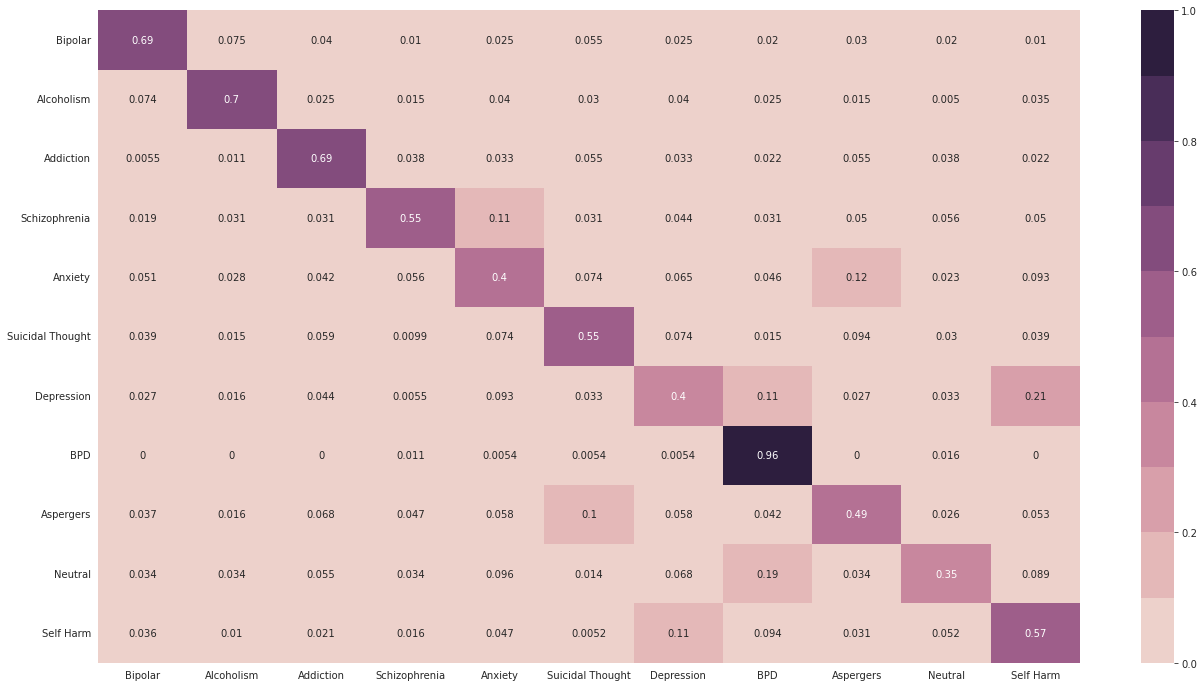

In [68]:
y_pred = XGBRrandom_search.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()

In [69]:
XGBRrandom_search.best_params_

{'min_child_weight': 7,
 'max_depth': 6,
 'learning_rate': 0.15,
 'gamma': 0.1,
 'colsample_bytree': 0.3}

# AdaBoost

In [70]:
from sklearn.ensemble import AdaBoostClassifier


Test set accuracy 0.5053449951409135
                  precision    recall  f1-score   support

         Bipolar       0.69      0.61      0.65       200
      Alcoholism       0.83      0.59      0.69       202
       Addiction       0.53      0.61      0.57       183
   Schizophrenia       0.67      0.49      0.56       160
         Anxiety       0.33      0.36      0.34       216
Suicidal Thought       0.55      0.44      0.49       203
      Depression       0.36      0.32      0.34       182
             BPD       0.62      0.83      0.71       184
       Aspergers       0.42      0.42      0.42       190
         Neutral       0.26      0.32      0.29       146
       Self Harm       0.45      0.54      0.49       192

        accuracy                           0.51      2058
       macro avg       0.52      0.50      0.50      2058
    weighted avg       0.52      0.51      0.51      2058



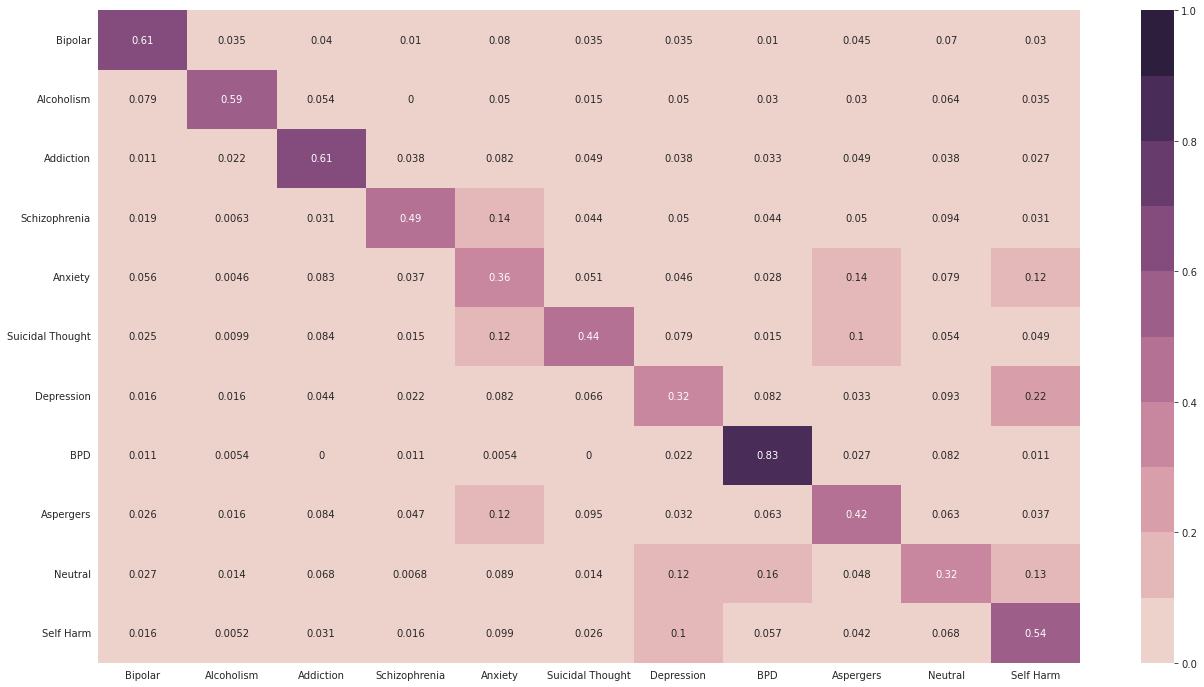

In [71]:
ADBclassifer = AdaBoostClassifier(n_estimators=60,
                         learning_rate=1)
ADBclassifer.fit(X_train, y_train)
y_pred = ADBclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1, cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
  


In [72]:
ADBclassifer.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1,
 'n_estimators': 60,
 'random_state': None}

In [73]:
#random search

In [74]:
ADBRclassifer = AdaBoostClassifier()

In [75]:
params_ADB = {
 "learning_rate" : [0.1,0.5,1.0,1.5,2.0],
 "n_estimators" : [ 20,40, 60, 80, 100]
}

In [76]:
ADBRrandom_search = RandomizedSearchCV(ADBRclassifer, params_ADB, cv=5, verbose=1, n_jobs=-1, n_iter=10, return_train_score=True)
ADBRrandom_search.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [77]:
ADBRrandom_search.cv_results_

{'mean_fit_time': array([6.68289742, 5.27589846, 5.27229695, 4.01459937, 5.3301991 ,
        6.59679952, 3.95960021, 5.27319951, 3.98409948, 5.61719904]),
 'std_fit_time': array([0.08484135, 0.0672373 , 0.05424479, 0.05271344, 0.03503204,
        0.10094041, 0.04476634, 0.07366592, 0.02612435, 0.33449898]),
 'mean_score_time': array([0.08809977, 0.07240105, 0.06840034, 0.05030069, 0.0729002 ,
        0.08319921, 0.05129962, 0.0635994 , 0.04959989, 0.05190105]),
 'std_score_time': array([0.00324743, 0.01072851, 0.00377319, 0.00278623, 0.010312  ,
        0.00393107, 0.00333962, 0.00945202, 0.00241703, 0.0024982 ]),
 'param_n_estimators': masked_array(data=[100, 80, 80, 60, 80, 100, 60, 80, 60, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[1.0, 1.5, 0.5, 1.5, 2.0, 0.5, 2.0, 0.1, 0.5, 2.0],
              mask=[False, False, F

Test set accuracy 0.5155490767735665
                  precision    recall  f1-score   support

         Bipolar       0.74      0.56      0.64       200
      Alcoholism       0.78      0.67      0.72       202
       Addiction       0.51      0.64      0.57       183
   Schizophrenia       0.71      0.47      0.56       160
         Anxiety       0.35      0.43      0.39       216
Suicidal Thought       0.55      0.38      0.45       203
      Depression       0.30      0.32      0.31       182
             BPD       0.66      0.86      0.75       184
       Aspergers       0.48      0.44      0.46       190
         Neutral       0.29      0.36      0.32       146
       Self Harm       0.48      0.51      0.49       192

        accuracy                           0.52      2058
       macro avg       0.53      0.51      0.51      2058
    weighted avg       0.54      0.52      0.52      2058



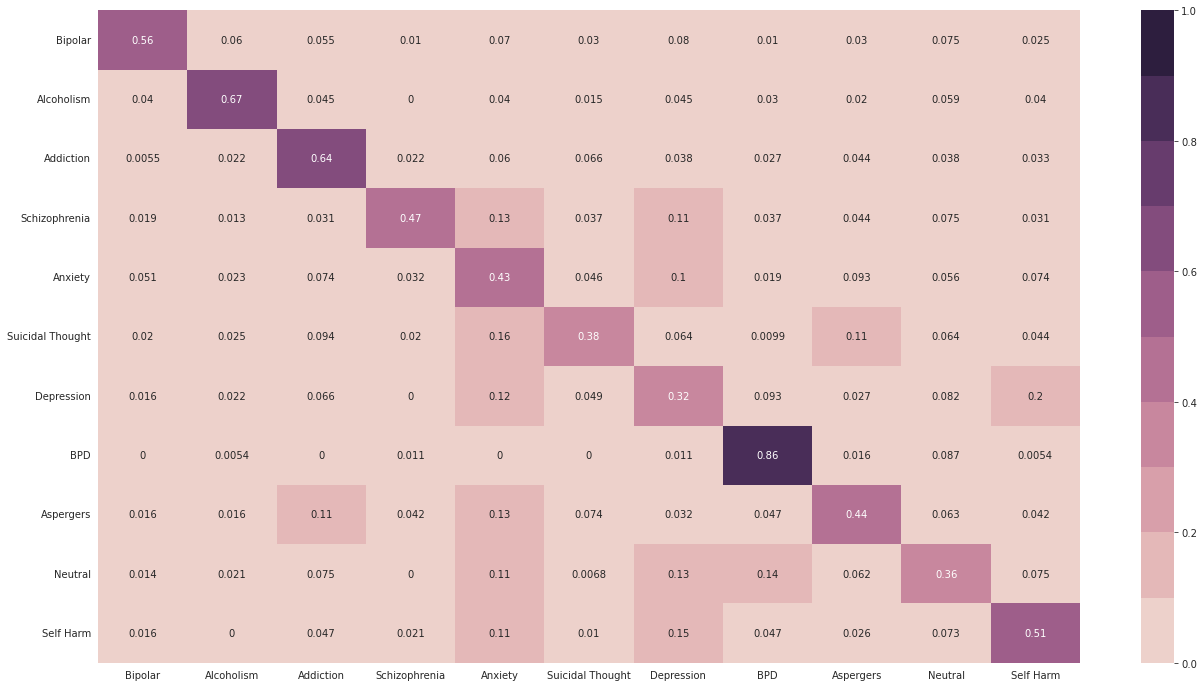

In [78]:
y_pred = ADBRrandom_search.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()

In [79]:
ADBRrandom_search.best_params_

{'n_estimators': 60, 'learning_rate': 0.5}

# Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier

Test set accuracy 0.5247813411078717
                  precision    recall  f1-score   support

         Bipolar       0.71      0.67      0.69       200
      Alcoholism       0.71      0.72      0.71       202
       Addiction       0.52      0.67      0.58       183
   Schizophrenia       0.60      0.44      0.51       160
         Anxiety       0.39      0.27      0.32       216
Suicidal Thought       0.49      0.51      0.50       203
      Depression       0.35      0.27      0.31       182
             BPD       0.48      0.98      0.65       184
       Aspergers       0.54      0.42      0.47       190
         Neutral       0.48      0.21      0.29       146
       Self Harm       0.47      0.54      0.50       192

        accuracy                           0.52      2058
       macro avg       0.52      0.52      0.50      2058
    weighted avg       0.52      0.52      0.51      2058



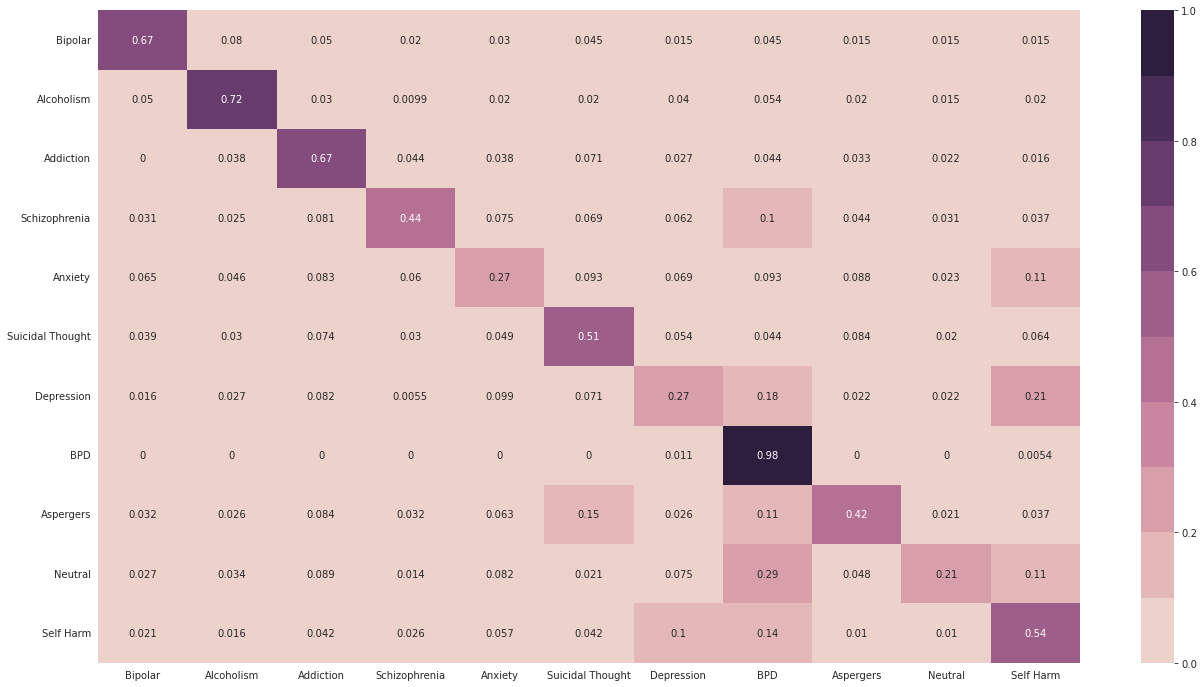

In [81]:
RFclassifer = RandomForestClassifier()
shapas = RFclassifer.fit(X_train, y_train)
y_pred = RFclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
  

In [83]:
RFclassifer.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [82]:
random_RF = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2,3,4,5,6,7,8,9,10],
               'min_samples_split': [2, 5,8, 10,15],
               'n_estimators': [50,100,150, 200, 250]}

In [84]:
RFRclassifer = RandomForestClassifier()

In [85]:
RFRrandom_search = RandomizedSearchCV(RFRclassifer, random_RF, cv=5, verbose=1, n_jobs=-1, n_iter=10, return_train_score=True)
RFRrandom_search.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [86]:
RFRrandom_search.cv_results_

{'mean_fit_time': array([26.91039853, 16.90519876,  0.96569662,  7.32869859,  1.07710009,
         5.34399872,  2.69969926,  6.42739854,  3.33329897,  3.68309946]),
 'std_fit_time': array([0.17053842, 0.10514728, 0.00791599, 0.17907606, 0.01208929,
        0.04997158, 0.03148066, 0.20552789, 0.02928458, 0.36992473]),
 'mean_score_time': array([0.17379913, 0.15199904, 0.02240229, 0.09950061, 0.02349997,
        0.08090043, 0.04699965, 0.08720188, 0.04540048, 0.04050002]),
 'std_score_time': array([0.00475989, 0.0058893 , 0.00037385, 0.00288248, 0.00089426,
        0.00373386, 0.00089527, 0.01008416, 0.00096902, 0.00311417]),
 'param_n_estimators': masked_array(data=[250, 250, 50, 200, 50, 150, 100, 200, 100, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 8, 15, 5, 10, 8, 8, 15, 10, 2],
              mask=[False, False

Test set accuracy 0.5524781341107872
                  precision    recall  f1-score   support

         Bipolar       0.74      0.67      0.70       200
      Alcoholism       0.71      0.73      0.72       202
       Addiction       0.56      0.69      0.61       183
   Schizophrenia       0.68      0.52      0.59       160
         Anxiety       0.47      0.35      0.40       216
Suicidal Thought       0.49      0.55      0.52       203
      Depression       0.39      0.30      0.34       182
             BPD       0.51      0.98      0.67       184
       Aspergers       0.51      0.42      0.46       190
         Neutral       0.56      0.23      0.33       146
       Self Harm       0.49      0.58      0.53       192

        accuracy                           0.55      2058
       macro avg       0.56      0.55      0.53      2058
    weighted avg       0.56      0.55      0.54      2058



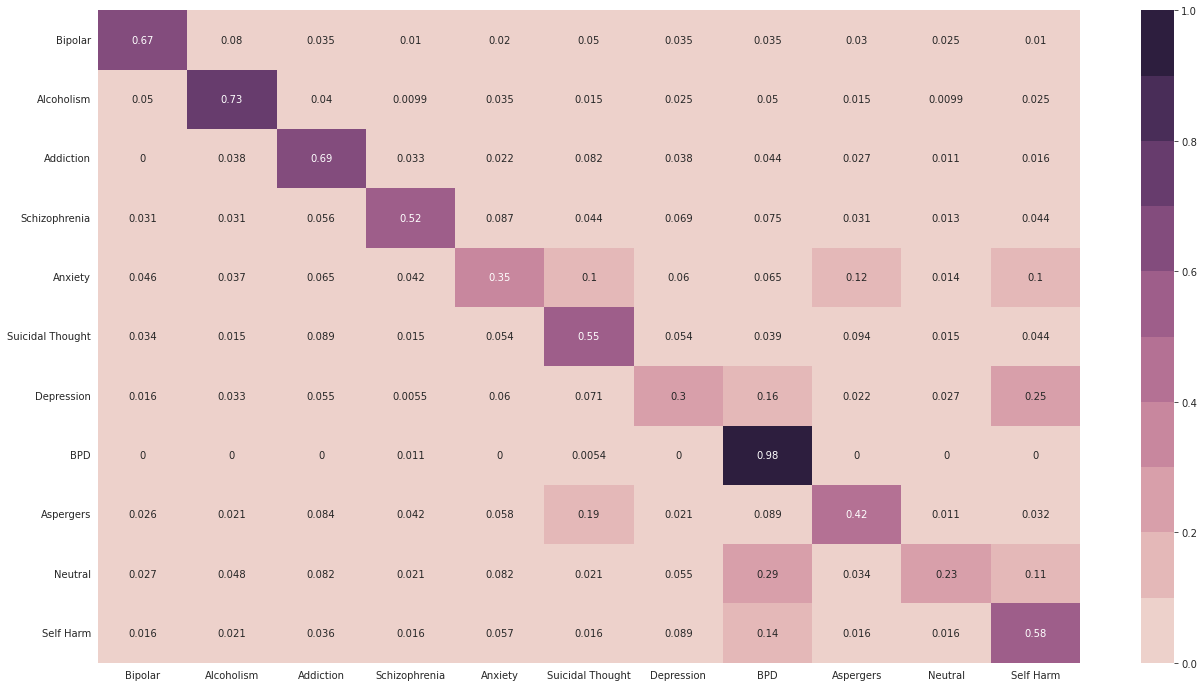

In [87]:
y_pred = RFRrandom_search.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()

In [88]:
RFRrandom_search.best_params_

{'n_estimators': 250,
 'min_samples_split': 8,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': False}

# SGD

In [39]:
from sklearn.linear_model import SGDClassifier

Test set accuracy 0.5830903790087464
                  precision    recall  f1-score   support

         Anxiety       0.68      0.74      0.71       200
             BPD       0.75      0.72      0.73       202
      Alcoholism       0.60      0.68      0.64       183
         Bipolar       0.61      0.60      0.60       160
       Addiction       0.58      0.34      0.43       216
       Aspergers       0.59      0.58      0.59       203
         Neutral       0.41      0.35      0.38       182
       Self Harm       0.58      0.90      0.71       184
   Schizophrenia       0.54      0.54      0.54       190
Suicidal Thought       0.46      0.32      0.38       146
      Depression       0.52      0.60      0.56       192

        accuracy                           0.58      2058
       macro avg       0.57      0.58      0.57      2058
    weighted avg       0.58      0.58      0.57      2058



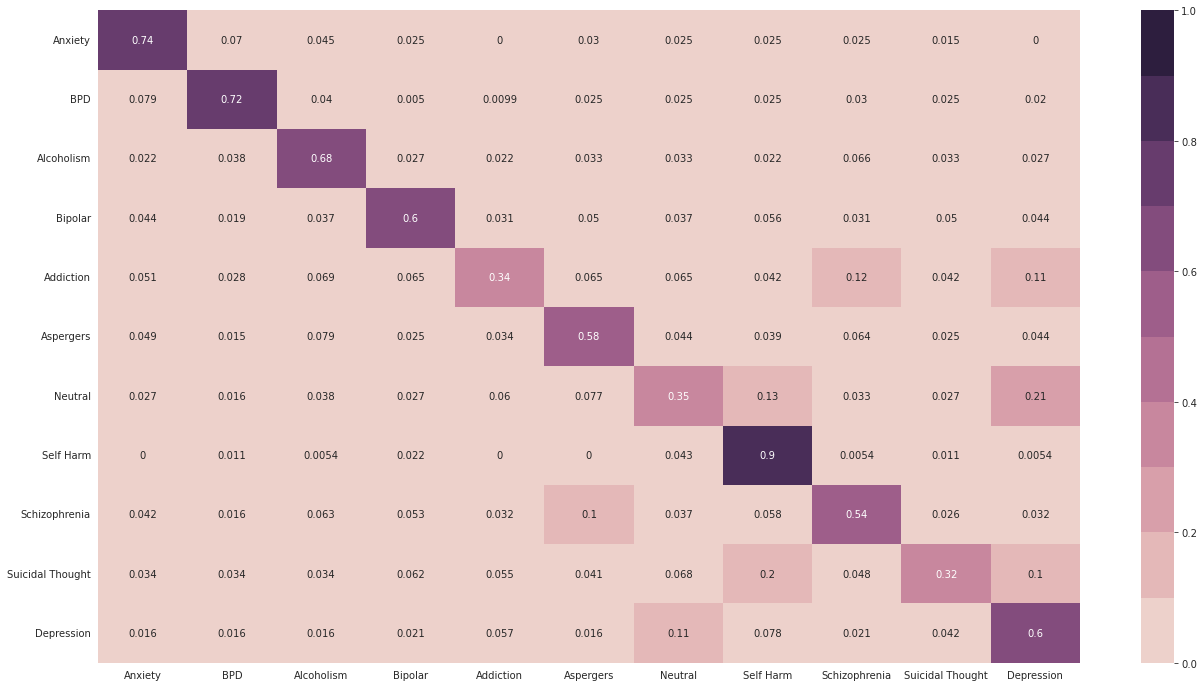

In [40]:
SGDclassifer = SGDClassifier()
SGDclassifer.fit(X_train, y_train)
y_pred = SGDclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #


cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()

In [41]:
SGDclassifer.get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [42]:
random_SGD = {'loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'],
               'penalty' : ['l1', 'l2', 'elasticnet'],
               'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
               'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}



In [43]:
#random search

In [44]:
SGDRclassifer = SGDClassifier()

In [45]:
SGDRrandom_search = RandomizedSearchCV(SGDRclassifer, random_SGD , cv=5, verbose=1, n_jobs=-1, n_iter=10, return_train_score=True)
SGDRrandom_search.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\moshi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\moshi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\moshi\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 890, in fit
    return self._fit(
  File "C:\Users\moshi\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 658, in _fit
    self._validate_params()
  File "C:\Users\moshi\anacon

In [46]:
SGDRrandom_search.cv_results_

{'mean_fit_time': array([0.00749936, 0.00889983, 0.52939792, 1.93073387, 0.00559812,
        0.00400085, 0.00530601, 0.00349979, 0.00369959, 0.00380015]),
 'std_fit_time': array([1.81525203e-03, 3.12019795e-03, 1.45500352e-02, 4.70809868e-01,
        1.35719755e-03, 3.13192054e-04, 1.25211846e-03, 3.16141180e-04,
        2.45341054e-04, 2.45281669e-04]),
 'mean_score_time': array([0.        , 0.        , 0.00160084, 0.00110106, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 'std_score_time': array([0.        , 0.        , 0.00019917, 0.0001999 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 'param_penalty': masked_array(data=['l2', 'l2', 'l1', 'elasticnet', 'l2', 'l1', 'l1', 'l1',
                    'l2', 'elasticnet'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_loss': masked_array(data=

Test set accuracy 0.5830903790087464
                  precision    recall  f1-score   support

         Anxiety       0.75      0.69      0.72       200
             BPD       0.78      0.73      0.76       202
      Alcoholism       0.60      0.69      0.65       183
         Bipolar       0.59      0.58      0.59       160
       Addiction       0.53      0.44      0.48       216
       Aspergers       0.62      0.55      0.58       203
         Neutral       0.42      0.41      0.41       182
       Self Harm       0.56      0.85      0.68       184
   Schizophrenia       0.50      0.53      0.51       190
Suicidal Thought       0.47      0.29      0.36       146
      Depression       0.53      0.59      0.56       192

        accuracy                           0.58      2058
       macro avg       0.58      0.58      0.57      2058
    weighted avg       0.58      0.58      0.58      2058



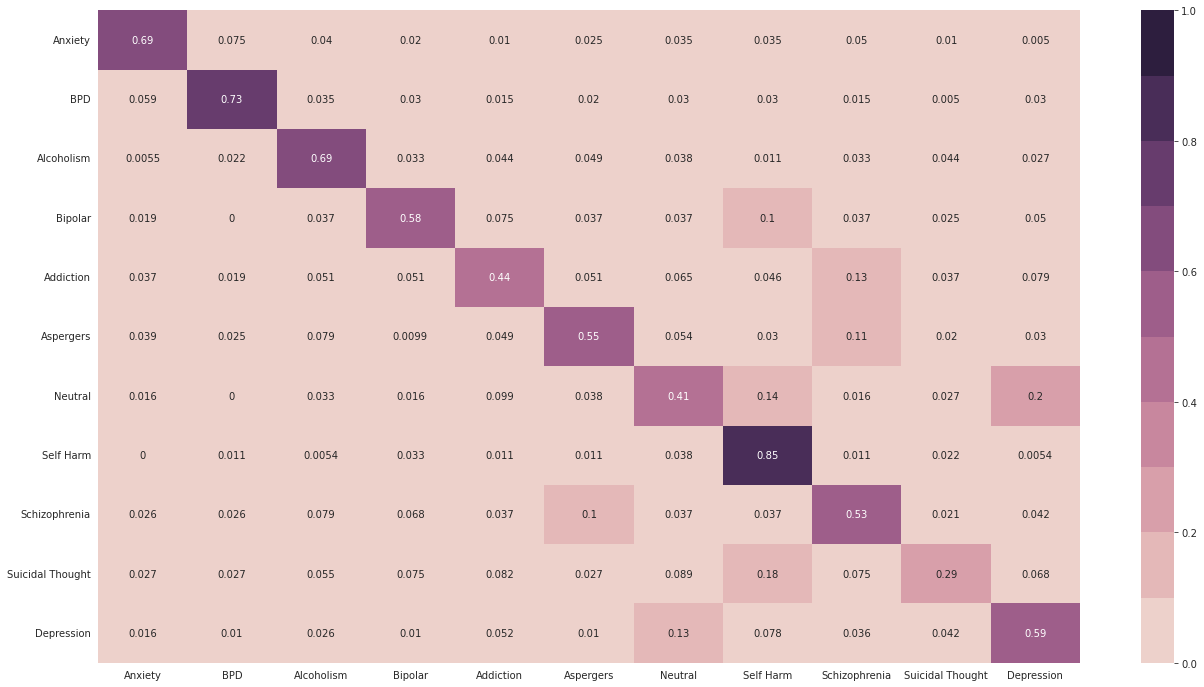

In [47]:
y_pred = SGDRrandom_search.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()

In [48]:
SGDRrandom_search.best_params_

{'penalty': 'l1',
 'loss': 'log_loss',
 'learning_rate': 'optimal',
 'alpha': 0.0001}

# Logistics Regression

In [98]:
from sklearn.linear_model import LogisticRegression

Test set accuracy 0.5879494655004859
                  precision    recall  f1-score   support

         Bipolar       0.74      0.69      0.71       200
      Alcoholism       0.78      0.71      0.75       202
       Addiction       0.63      0.69      0.66       183
   Schizophrenia       0.64      0.56      0.60       160
         Anxiety       0.53      0.48      0.50       216
Suicidal Thought       0.61      0.52      0.56       203
      Depression       0.43      0.42      0.43       182
             BPD       0.54      0.87      0.66       184
       Aspergers       0.55      0.59      0.57       190
         Neutral       0.47      0.30      0.37       146
       Self Harm       0.53      0.58      0.55       192

        accuracy                           0.59      2058
       macro avg       0.59      0.58      0.58      2058
    weighted avg       0.59      0.59      0.58      2058



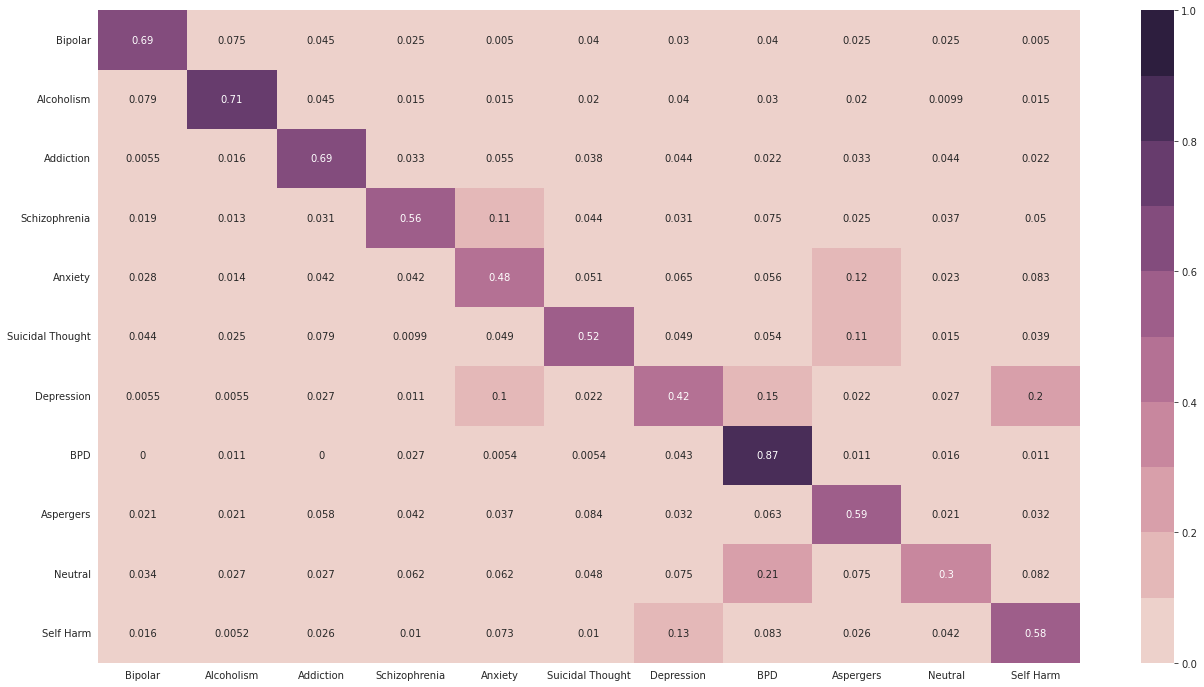

In [99]:
LRclassifer = LogisticRegression()
LRclassifer.fit(X_train, y_train)
y_pred = LRclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()

In [100]:
LRclassifer.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [101]:
param_LR = {
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty' : ['l2'],
    'C'       : [100, 10, 1.0, 0.1, 0.01]
}

In [102]:
#Random Search

In [103]:
LRclassifer = LogisticRegression()

In [104]:
LRRrandom_search = RandomizedSearchCV(LRclassifer, param_LR , cv=5, verbose=1, n_jobs=-1, n_iter=10, return_train_score=True)
LRRrandom_search.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [105]:
LRRrandom_search.cv_results_

{'mean_fit_time': array([0.40609832, 0.26629848, 2.62520113, 2.69819899, 3.88640065,
        0.63819871, 0.77240038, 0.86039929, 0.42040005, 0.957198  ]),
 'std_fit_time': array([0.01204749, 0.03012346, 0.12916601, 0.0646126 , 0.63435062,
        0.02581996, 0.11605493, 0.02747787, 0.01315071, 0.0695783 ]),
 'mean_score_time': array([0.00240116, 0.00170088, 0.0035985 , 0.00279884, 0.00109906,
        0.00190015, 0.00200219, 0.00269938, 0.00240145, 0.0013001 ]),
 'std_score_time': array([0.00086257, 0.00039817, 0.00073204, 0.00067794, 0.00048785,
        0.0003739 , 0.00031516, 0.00074808, 0.00048844, 0.0002449 ]),
 'param_solver': masked_array(data=['newton-cg', 'liblinear', 'lbfgs', 'lbfgs',
                    'newton-cg', 'liblinear', 'liblinear', 'lbfgs',
                    'lbfgs', 'newton-cg'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked

Test set accuracy 0.5879494655004859
                  precision    recall  f1-score   support

         Bipolar       0.74      0.69      0.71       200
      Alcoholism       0.79      0.71      0.75       202
       Addiction       0.63      0.69      0.66       183
   Schizophrenia       0.64      0.56      0.60       160
         Anxiety       0.53      0.48      0.50       216
Suicidal Thought       0.61      0.52      0.56       203
      Depression       0.43      0.42      0.43       182
             BPD       0.54      0.87      0.66       184
       Aspergers       0.55      0.59      0.57       190
         Neutral       0.47      0.30      0.37       146
       Self Harm       0.53      0.58      0.55       192

        accuracy                           0.59      2058
       macro avg       0.59      0.58      0.58      2058
    weighted avg       0.59      0.59      0.58      2058



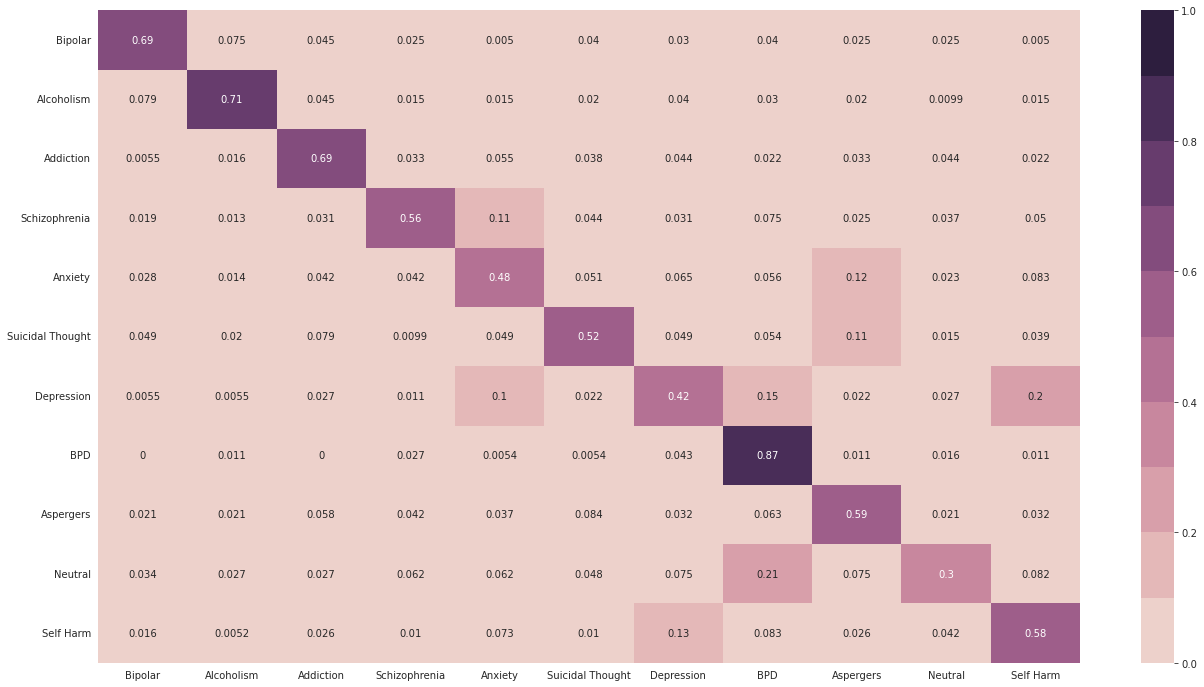

In [106]:
y_pred = LRRrandom_search.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()

In [107]:
LRRrandom_search.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 1.0}

In [ ]:
#LIME

In [127]:

idx = df.index[10]

c = make_pipeline(count_vect, RFclassifer)
class_names = ['Addiction','Alcoholism','Anxiety','Aspergers','Bipolar','Borderline Personality', 'Depression', 'Schizophernia', 'SelfHarm', 'Suidal Thought', 'neutral']
explainer = LimeTextExplainer(class_names = class_names)
exp = explainer.explain_instance(df.Description[index], c.predict_proba, num_features = 10)



In [125]:
df.Description[10]

'প্রায় ৪ বছর প্রেসক্রিপশন গত বছর ধীরে ধীরে বেশি শুরু করেছি আপাতত দূরে থাকতে সক্ষম থেরাপিস্ট ডাক্তার নির্ধারিত সাধারণত মনে দেশে লাল পতাকা উত্থাপন নির্ধারিত সেগুলি গ্রহণ চেয়ে প্রায় ৫ গুণ দ্রুত বড়িগুলি দিয়ে যাই অপব্যবহারও নজরে পড়েনি বাবামা মনে ড্রাগ করছি ভুল নয় জানেন প্রেসক্রিপশন যাইহোক আইনি পার্থক্য সহকর্মীরাও মন্তব্য আমাকে মনে কঠিন জীবন যাপন করছি সত্য সবে ঘুমাই গত ৫ মাস রাতে প্রায় ২৪ ঘন্টা ঘুমের সাথে কাজ যাচ্ছি পুরানো ফটোগুলি দেখছিলাম পরিবর্তনটি লক্ষ্য করেও দেখতাম যাইহোক আগামীকাল সেগুলিকে নির্দেশিত গ্রহণ চেষ্টা করব কমপক্ষে কম শুরু করব'

In [128]:
exp.show_in_notebook(text = True)